
# Financial Data Analysis Using Python

This tutorial will give a bird's eye view of how to leverage the powerful functionality of various python packages to do  financial data analysis through series of steps which include: accessing financial data, data exploration, simple strategies for financial investment and finally build an predictive model fortime-series data such as stock price to help guide our future financial decisions.

Before we proceeed further, kindly install the following required packages for the tutorial in the Anaconda <br>
1. pandas_datareader <br>
2. seaborn <br>
3. plotly <br>
4. fbprophet <br>

## Accessing Financial Data 
To access the financial data we use the pandas_datareader package which provides remote data access to get financial data in the form of a pandas dataframe. We use the DataReader() object to get access to stock price data through four attributes which include: <br>
**Ticker** of given stock . <br>
**Data Source** from  which we want to extract data from such as google, quandl, morningstar...( morningstar is more stable) <br>
**Start** and **End** dates for which we need the stock price data. <br>

In general stock price data consists of following features:<br>
1. **Open** - the openeing price of the stock in a given day
2. **Close** - the closing price of the stock in a given day
3. **High** - the highist price of the stock in a given day
4. **Low** - the lowest price of the stock in a given day
5. **Volume** - the number of shares traded in a given day

After accessing the data we also get some summary statistics using describe() method in pandas dataframe.

In [1]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
start_date =  datetime.date(2010,1,1)
end_date = datetime.date(2017,12,31)
data_source = 'morningstar'
ticker = 'IBM'
stock_data_IBM = pdr.data.DataReader(ticker, data_source, start_date, end_date)

In [3]:
stock_data_IBM.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2086 entries, (IBM, 2010-01-01 00:00:00) to (IBM, 2017-12-29 00:00:00)
Data columns (total 5 columns):
Close     2086 non-null float64
High      2086 non-null float64
Low       2086 non-null float64
Open      2086 non-null float64
Volume    2086 non-null int64
dtypes: float64(4), int64(1)
memory usage: 104.0+ KB


In [4]:
# get some summary statistics of the stck data using describe
stock_data_IBM.describe()

,Close,High,Low,Open,Volume
count,2086.000000,2086.000000,2086.000000,2086.000000,2.086000e+03
mean,167.388136,168.451756,166.260472,167.306707,4.549999e+06
std,23.658511,23.747889,23.601827,23.661051,2.482201e+06
min,117.850000,119.660000,116.000000,118.460000,0.000000e+00
25%,149.377500,150.460000,148.475000,149.630000,3.211704e+06
50%,165.360000,166.365000,164.075000,165.100000,4.061722e+06
75%,187.965000,189.345000,186.807500,188.007500,5.271757e+06
max,215.800000,215.900000,214.300000,215.380000,3.049019e+07


In [5]:
stock_data_IBM.head()

Close    High     Low    Open   Volume
Symbol Date                                               
IBM    2010-01-01  130.90  132.85  130.75  132.41        0
       2010-01-04  132.45  132.97  130.85  131.18  6155846
       2010-01-05  130.85  131.85  130.10  131.68  6842471
       2010-01-06  130.00  131.49  129.81  130.68  5605290
       2010-01-07  129.55  130.25  128.91  129.87  5840569

In [6]:
# To help with future visualisation drop the 'Symbol' index
stock_data_IBM = stock_data_IBM.reset_index(level='Symbol', drop = True)

In [7]:
stock_data_IBM.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-01,130.90,132.85,130.75,132.41,0
2010-01-04,132.45,132.97,130.85,131.18,6155846
2010-01-05,130.85,131.85,130.10,131.68,6842471
2010-01-06,130.00,131.49,129.81,130.68,5605290
2010-01-07,129.55,130.25,128.91,129.87,5840569


## Visualize the Financial Data
Now we visualize the financial time-series data using the matplotlib and seaborn packages. We sue set() method to get default settings of seaborn to matplotlib plots for better viualisations.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

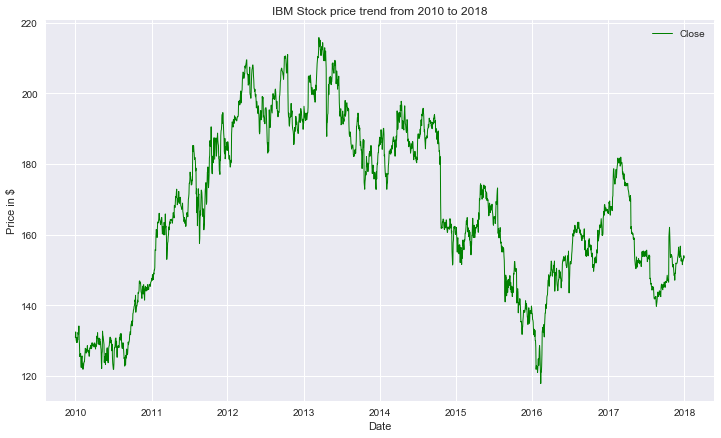

In [9]:
stock_data_IBM['Close'].plot(title = 'IBM Stock price trend from 2010 to 2018', legend = True, color = 'green', figsize = (12,7), linewidth=1.0)
plt.ylabel("Price in $")
plt.show()

### Visualizing Price Movements of stock using candlestick chart.
In order to extract more information from the price trends we could use candlestick chart from the plotly library. Candlestick is the most commonly used financial chart that gives the details of price movements of stock in a single day. It includes the details of open, close , high and low prices of the stock in a given trading day. A green candle indicates there has been a net increase and a red candle indicates there has been net decrease in stock price during the day. 

We can move the cursor over the interactive plot which gives us details regarding the open, close , high and low prices of the stock in a given trading day by zooming in and out. (just hover the cursor over the top rightmost corner of the plot, you will see the zoom in and out buttons)

**Note:**
Kindly re-run the cell if you see a blank white space or refer to the .html document which contains entire tutorial in html format.

In [10]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline
plotly.offline.init_notebook_mode(connected=True)

trace = go.Candlestick(x=stock_data_IBM.index,
                       open=stock_data_IBM.Open,
                       high=stock_data_IBM.High,
                       low=stock_data_IBM.Low,
                       close=stock_data_IBM.Close)
data = [trace]
plotly.offline.iplot(data)

### Analyze Percentage Change in Price and Volume
Let us now track the daily percentage change in Closing price and Voulme of shares traded.
The **pct_change()** method of pandas is useful in computing the percentage change across the rows in a given column of a pandas dataframe.

Tracking the percentage change in price and volume per day can help us  identify important landmarks in stock price movements like any new merger and acquisitions or new product launches etc.

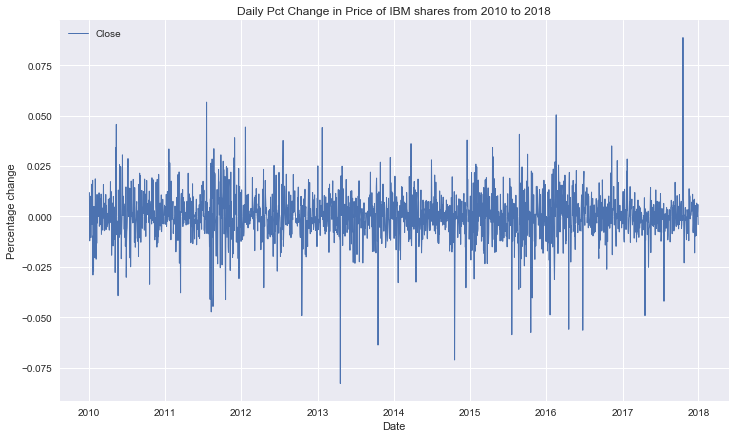

In [32]:
stock_data_IBM['Close'].pct_change().plot(title = 'Daily Pct Change in Price of IBM shares from 2010 to 2018', legend = True, figsize = (12,7), linewidth=1.0)
plt.ylabel("Percentage change")
plt.show()

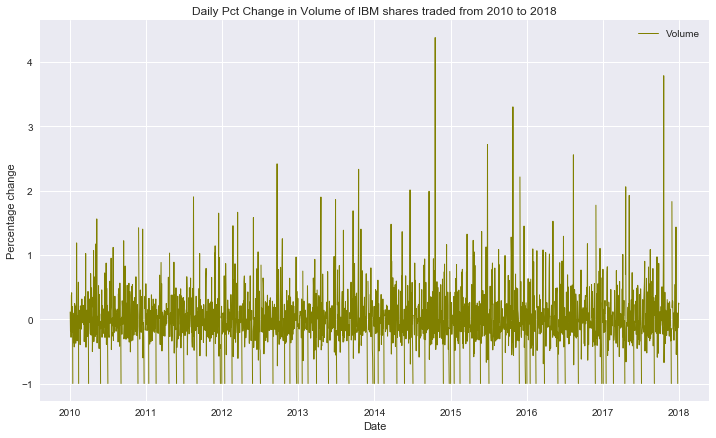

In [12]:
stock_data_IBM['Volume'].pct_change().plot(title = 'Daily Pct Change in Volume of IBM shares traded from 2010 to 2018', color = 'olive', legend = True, figsize = (12,7), linewidth=1.0)
plt.ylabel("Percentage change")
plt.show()

## Basic Strategy : Comparision between stocks IBM and Microsoft

Now let us develop a basic strategy which helps us to make better investment decisions. Any naive investment staregy starts with a simple comparision with another stock in a similar sector of the economy. In this case let us compare two major rivals "IBM" and "Microsoft" in technological space.

We know by basic intuition that it is not very simple to compare two stocks directly, as their stock prices are different. To facilitate comparision let us benchmark their initial prices on 1st of January 2010 as 100, by multiplying with a normalization constant. We should also change the subsequent prices of the stock by multiplying with the same normalization constant for consistncy. The normalizing constant generally is (100/ Initial_Stock_Price) for each stock.

Now we plot the time-series plot of these stocks in the same graph. This plot tracks the price movements of two stocks in a hypothetical scenario where we invest $100 each in the Microsoft and IBM stocks on 1st January 2010. As we could clearly see from the plot "Microsoft" gives the higher returns than "IBM" by the end of 2017 and it is in an upward trajectory. Thus, it makes sense to invest in "Microsoft" in near furture.

In [13]:
# get the stock price data for microsoft
start_date =  datetime.date(2010,1,1)
end_date = datetime.date(2017,12,31)
data_source = 'morningstar'
ticker = 'MSFT'
stock_data_MSFT = pdr.data.DataReader(ticker, data_source, start_date, end_date)
stock_data_MSFT = stock_data_MSFT.reset_index(level='Symbol', drop = True)

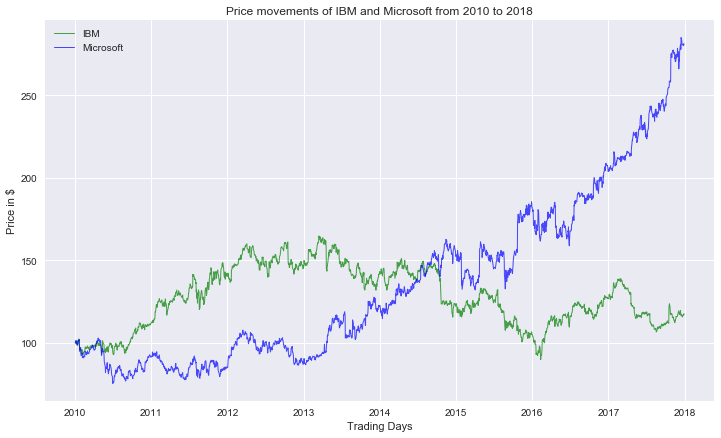

In [14]:
fig = plt.figure(figsize=(12,7))
plt.plot(stock_data_IBM.index.values, (stock_data_IBM['Close'].values*100)/stock_data_IBM['Close'].values[0], color = 'green', label = 'IBM', alpha = 0.7,linewidth=1.0)
plt.plot(stock_data_MSFT.index.values, (stock_data_MSFT['Close'].values*100)/stock_data_MSFT['Close'].values[0],color = 'blue', label = 'Microsoft', alpha = 0.7,linewidth=1.0)
plt.legend(loc='best')
plt.xlabel('Trading Days')
plt.ylabel('Price in $')
plt.title('Price movements of IBM and Microsoft from 2010 to 2018')
plt.show()

## Simple Moving Average Trading Strategy

Now we become a little greedy!. Let us suppose we already invested in "IBM" on 1st of January 2010. Since, we are in the past we have no idea of the future price movements. Based on common sense we know taht stock prices usually raise and fall in a cycle. If we can sell a stock at its peak just before a "Bearish" cycle and buy again at its lowest point just before a "Bullish" cycle we can easily maximize our profits. 

For example: We buy a stock at price 100 dollars on day-1 and the stock reaches 130 dollars on day-10. The overall profit is 30 if we decide to sell it on day-10. But interestingly the stock rose to 150 on day 4 and fell to 70 on day-6. If we had sold the stock on day-4, we can pocket a profit of 50. Later, if we had further bought it again at 70 on day-6 and sold it back on day-10 at 130, we could pocket another 60. Thus, our overall profit could have been 110 dollars instead of mere 30 dollars in the first case.

To ensure we can take advantage of these price movements we need a "Soothsayer" who tells us when to Buy or Sell a stock. Financial Traders across the world use the Simple moving Averges as a important tool to perform this "Soothsaying"!. Two moving averages can be used in combination to generate a powerful “crossover” trading signal. This is in general called  **Moving average Trading Strategy**. The crossover method involves buying or selling when a short term moving average crosses a long term moving average. A golden cross occurs when the 50-day moving average rises above 200-day moving average; it is considered a bullish sign and a **Buy Signal** is given. A death cross occurs when the 50-day moving average drops below 200-day moving average; it is considered a bearish sign and a **Sell Signal** is given.

The **rolling()** method of pandas is quite useful in computing the simple moving averages by specifying the window size with the "window " parameter. Now we apply our new found strategy on the "IBM" stock to visualize the 50-day and 200-day moving averages along with crossing points highlighted in **Red**.

In [15]:
start_date =  datetime.date(2009,1,1)
end_date = datetime.date(2017,12,31)
data_source = 'morningstar'
ticker = 'IBM'
trading_data = pdr.data.DataReader(ticker, data_source, start_date, end_date)
# To help with future visualisation drop the 'Symbol' index
trading_data = trading_data.reset_index(level='Symbol', drop = True)

In [16]:
# computing the moving average
mov_avg200_data = trading_data.rolling(window = 200).mean()
mov_avg50_data = trading_data.rolling(window = 50).mean()

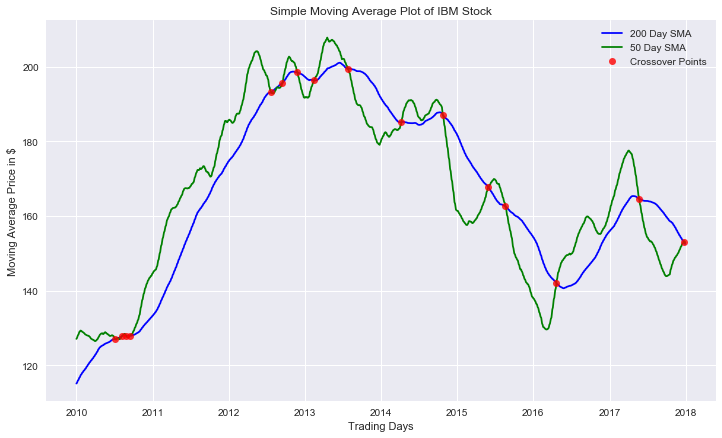

In [17]:
#plot the long term and short term moving averages identifying the crossover points
start = mov_avg200_data.index.get_loc('2010-01-01')
fig = plt.figure(figsize=(12,7))
plt.plot(mov_avg200_data[start:].index.values, mov_avg200_data[start:]['Close'].values, color = 'blue', label = '200 Day SMA')
plt.plot(mov_avg50_data[start:].index.values, mov_avg50_data[start:]['Close'].values,color = 'green', label = '50 Day SMA')
   # Identify the crossover points
idx = np.argwhere(np.diff(np.sign(mov_avg200_data[start:]['Close'].values - mov_avg50_data[start:]['Close'].values)) != 0).reshape(-1) + 0
plt.plot(mov_avg200_data[start:].index.values[idx], mov_avg200_data[start:]['Close'].values[idx], 'ro', alpha = 0.8, label = "Crossover Points")
plt.legend(loc='best')
plt.xlabel('Trading Days')
plt.ylabel('Moving Average Price in $')
plt.title('Simple Moving Average Plot of IBM Stock')
plt.show()

#### Potential trading dates based on Crossover Points

In [18]:
trading_dates = mov_avg200_data[start:].index.values[idx]
trading_dates = [pd.to_datetime(str(i))for i in trading_dates]
trading_dates = [date.strftime('%Y-%m-%d') for date in trading_dates]
print(trading_dates)

['2010-07-06', '2010-08-06', '2010-08-26', '2010-09-13', '2012-07-24', '2012-09-13', '2012-11-26', '2013-02-13', '2013-07-26', '2014-04-08', '2014-10-24', '2015-05-29', '2015-08-20', '2016-04-20', '2017-05-22', '2017-12-22']


## Stock Prediction using Additive Models

Now let us try to build a model to predict future price of a stock. Stock price forecasting is a very complex task. Additive models are a recent addition to analysing and predecting time-series data such as stock prices. The fbprophet package released by facebook containing the Prophet model is essentially an Additive Model. In Additive Models, non-linear trends are fit with yearly and weekly seasonality. Prophet is robust to missing data, shifts in the trend, and large outliers.

Prophet Model expects data frame with two columns with names 'ds' for date column and 'y' for stock price column. So, we modify the column names of the dataframe to encorporate this. We then split the dataframe into train and test set. Train the model and predict the stock price for both train and test set and plot it as shown in the figure below.

One of the major advantage with Prophet model is that it also gives us "Uncertainity" of prediction.

In [19]:
from fbprophet import Prophet
from sklearn.model_selection import train_test_split

In [20]:
df = stock_data_IBM.reset_index(level = 0)

In [21]:
# rename the columns date as 'ds' and 'Close' as y to make it compatible with the prophet model
df = df[['Date','Close']]
df.columns = ['ds','y']
df.head()

,ds,y
0,2010-01-01,130.90
1,2010-01-04,132.45
2,2010-01-05,130.85
3,2010-01-06,130.00
4,2010-01-07,129.55


In [22]:
df.count()

ds    2086
y     2086
dtype: int64

In [23]:
train_df = df[0: 1900]
test_df = df[1900:] 

In [24]:
model = Prophet(daily_seasonality=False)
model.fit(train_df)
prediction = model.predict(df[['ds']])

### Visualize the Predictions

Now let us visualize the predictions with a confidence interval. The vertial black line seperates the train data from the test data.

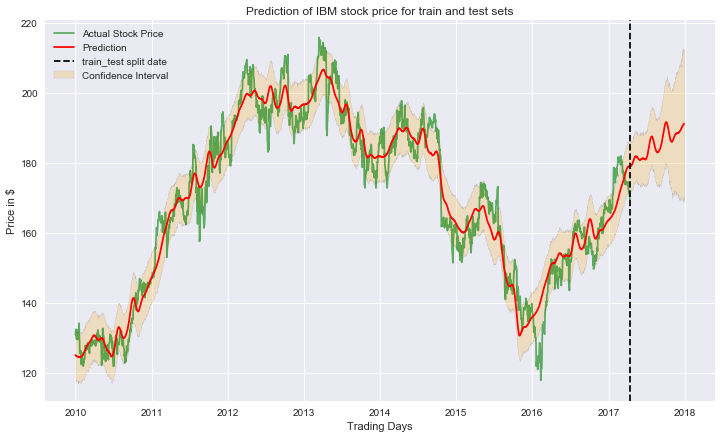

In [25]:
fig = plt.figure(figsize=(12,7))
plt.plot(train_df['ds'].values, train_df['y'].values, color = "green", alpha = 0.6, label = 'Actual Stock Price')
plt.plot(prediction['ds'].values, prediction['yhat'].values, color = 'red', label = 'Prediction');
# Plot the confidence interval
plt.fill_between(prediction['ds'].values, prediction['yhat_upper'].values, prediction['yhat_lower'].values, alpha = 0.2, facecolor = 'orange', edgecolor = 'k',label = 'Confidence Interval')
#plot the dividing line between train and test data
plt.axvline(x= df.iloc[1900].values[0], color='k', label = "train_test split date",linestyle='--')
plt.legend(loc = 'best'); 
plt.xlabel('Trading Days'); 
plt.ylabel('Price in $');
plt.title("Prediction of IBM stock price for train and test sets");
plt.show()

### Visualize the Forecast Components
fbprophet package provides a **plot_components()** method to help visualize the **Trend** and **Seasonality** - yearly and weekly.<br>
From the plots shown below we can conclude that:
1. There is a general "increasing" Trend in the near future.
2. The stock price of IBM generally reaches its peak in the months of April, May, August and October every year.
3. Stock generally reaches its peak value during thursday every week.


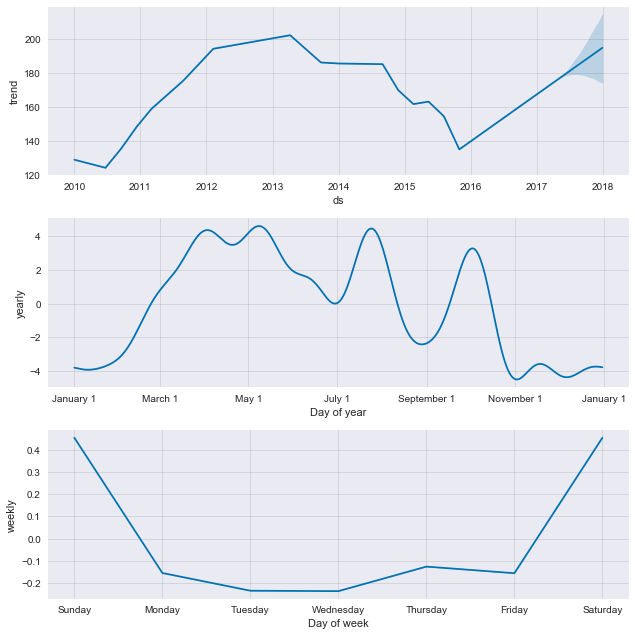

In [26]:
model.plot_components(prediction);
plt.show()

### Evaluation of the Model
Now let us evaluate the model my measuring the mean squared error of prediction for both train and test data. Prophet model has a hyperparameter changepoint_prior_scale which determines the flexibility of the model. Changepoints are essentially points in time-series data where there is a change such as sudden increase or decrease. The Prior scale parameter determines the weight given to these changepoints. The higher the weight the more flexible the model but it also leads to overfitting. The default value of prophet model is 0.05. So, the prediction plot plotted previously is for changepoint_prior_scale vlue of 0.05. 

To evaluate the model properly, we plot the train and test error vs changepoint_prior_scale parameter. We could see from the Error Plot that optimum value of changepoint_prior_scale parameter is 0.005 to prevent overfitting and not 0.05.

Thus, we train a new optimal model with given hyper-parameter and plot the predictions. We can clearly see from the new prediction plot that the prediction for test data differs significantly from the previous plot and also the confidence interval is lot more compact.

In [27]:
changepoints = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]
N = len(test_df['y'].values)
train_error_list = []
test_error_list = []
for i in  changepoints:
    model = Prophet(changepoint_prior_scale = i, daily_seasonality=False)
    model.fit(train_df)
    train_prediction = model.predict(train_df[['ds']])
    test_prediction = model.predict(test_df[['ds']])
    # calculate the error
    train_error = np.sum((train_prediction['yhat'].values - train_df['y'].values)**2)/2
    test_error = np.sum((test_prediction['yhat'].values - test_df['y'].values)**2)/2
    train_error_list.append(train_error)
    test_error_list.append(test_error)
    
    

#### Plot the Errors vs Parameter

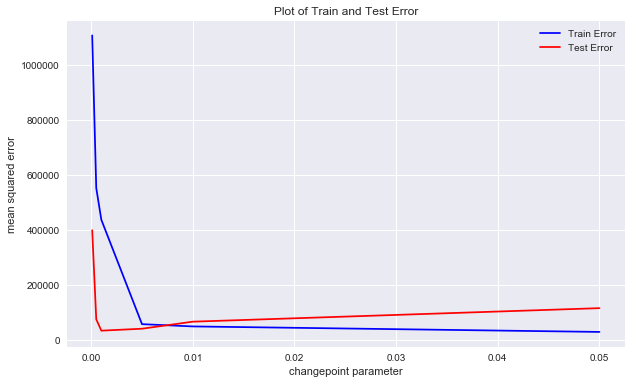

In [31]:
fig = plt.figure(figsize=(10,6))
plt.plot(changepoints, train_error_list, color = 'blue', label = 'Train Error')
plt.plot(changepoints, test_error_list, color = 'red', label = 'Test Error')
plt.legend(loc = 'best'); 
plt.xlabel('changepoint parameter'); 
plt.ylabel('mean squared error');
plt.title("Plot of Train and Test Error");
plt.show()

In [29]:
model = Prophet(changepoint_prior_scale = 0.005, daily_seasonality=False)
model.fit(train_df)
prediction = model.predict(df[['ds']])

#### Plot the prediction for optimal model.
The black dotted line seperates the train from test data

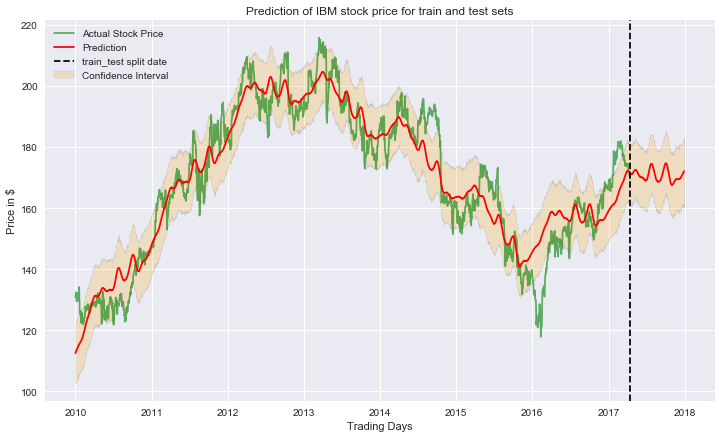

In [30]:
fig = plt.figure(figsize=(12,7))
plt.plot(train_df['ds'].values, train_df['y'].values, color = "green", alpha = 0.6, label = 'Actual Stock Price')
plt.plot(prediction['ds'].values, prediction['yhat'].values, color = 'red',  label = 'Prediction');
# Plot the confidence interval
plt.fill_between(prediction['ds'].values, prediction['yhat_upper'].values, prediction['yhat_lower'].values, alpha = 0.2, facecolor = 'orange', edgecolor = 'k', label = 'Confidence Interval')
#plot the dividing line between train and test data
plt.axvline(x= df.iloc[1900].values[0], color='k', label = "train_test split date",linestyle='--')
plt.legend(loc = 'best'); 
plt.xlabel('Trading Days'); 
plt.ylabel('Price in $');
plt.title("Prediction of IBM stock price for train and test sets");
plt.show()

# References:

1. Plotly guide for candlechart plots link: https://plot.ly/python/candlestick-charts/ <br>

2. William Koehrsen article on "Stock Prediction in Python" was extremely useful in highlighting the use of additive models in stock prediction. 
https://towardsdatascience.com/stock-prediction-in-python-b66555171a2

3. fbprophet quick start guide: https://facebook.github.io/prophet/docs/quick_start.html.
